# Walmart Sales EDA

##  To predict the Supply and Demand accurately

### 1.Which store has maximum sales
### 2.Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out co-efficient of variance
### 3.Which store/s has good quarterly growth rate in Q3’2012
### 4.Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
### 5.Provide a monthly and semester view of sales in units and give insights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
%matplotlib inline

In [75]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


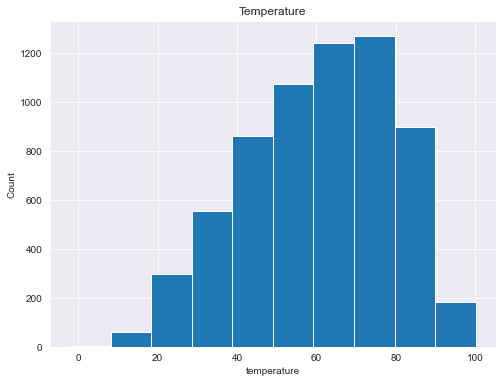

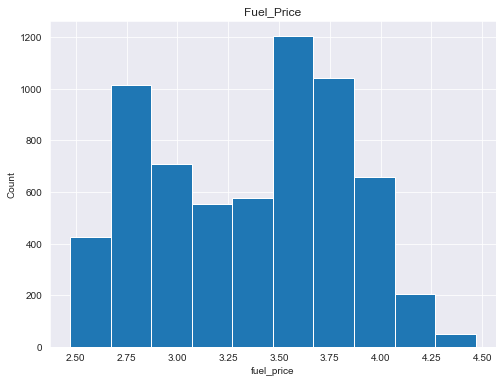

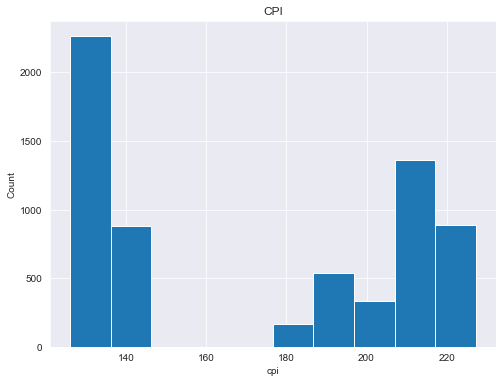

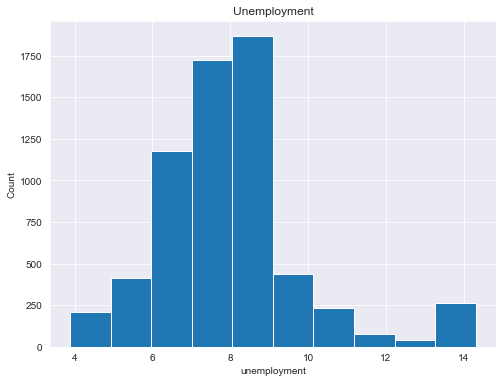

In [301]:
for i in df[['Temperature','Fuel_Price','CPI','Unemployment']]:
    sns.set_style('darkgrid')
    plt.figure(figsize=(8,6))
    plt.hist(df[i])
    plt.title(i)
    plt.xlabel(i.lower())
    plt.ylabel('Count')
    plt.show()

### 1.Which store has maximum sales in this dataset


In [306]:
# df.loc[df['Weekly_Sales'] == df['Weekly_Sales'].max()]
df[df['Weekly_Sales'] == df['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724,2010,4


#### Ans: Store 14 has the Maximum Amount of Sales in the dataset

## 2.which stores has maximum std.dev 

In [78]:
max_std = (
     df.groupby('Store').agg({'Weekly_Sales':['std','mean']})
)

In [79]:
max_std = max_std.reset_index()

In [80]:
max_std['CoV']=(
    max_std[('Weekly_Sales','std')] / max_std[('Weekly_Sales','mean')]*100
)

In [81]:
max_std[max_std[('Weekly_Sales','std')] == max_std[('Weekly_Sales','std')].max()]

Store   Weekly_Sales                      CoV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

#### Ans: Store 14 has the Maximum Standard Deviation in the dataset

### 3.which store has good quarterly growth rate in q3's 2012

In [82]:
# Converting the data type of data column to dateTime
df['Date'] =pd.to_datetime(df['Date'])

In [83]:
# Extracting Year from date column
df['Year'] = df['Date'].dt.year

# Extracting Quarter from date column
df['Quarter'] =df['Date'].dt.quarter

In [85]:
# Extracting 2012 from Year and q2 from Quarter 
q2 = df[(df['Year'] == 2012) & (df['Quarter'] == 2)]

# Extracting 2012 from Year and q3 from Quarter 
q3 = df[(df['Year'] == 2012) & (df['Quarter'] == 3)]

In [87]:
# Summing Weekly Sales from the q2 and q3 dataset
# q2
q2_sum =pd.DataFrame(q2.groupby('Store')['Weekly_Sales'].sum())
q2_sum = q2_sum.reset_index()
q2_sum.rename(columns={'Weekly_Sales':'Q2_Weekly_Sales'},inplace=True)

In [88]:
#q3
q3_sum =pd.DataFrame(q3.groupby('Store')['Weekly_Sales'].sum())
q3_sum = q3_sum.reset_index()
q3_sum.rename(columns={'Weekly_Sales':'Q3_Weekly_Sales'},inplace=True)

In [92]:
# Merging q2 and q3
q3_growth = q2_sum.merge(q3_sum,how='inner',on='Store')

In [95]:
# percent of change = new value - old value / old value * 100

In [107]:
q3_growth['Growth_Rate %'] =((q3_growth['Q3_Weekly_Sales'] - q3_growth['Q2_Weekly_Sales'])/q3_growth['Q2_Weekly_Sales'])*100
q3_growth['Growth_Rate %'] =round(q3_growth['Growth_Rate %'],2)
q3_growth.sort_values('Growth_Rate %',ascending=False).head(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate %
15,16,6626133.44,6441311.11,-2.79


In [108]:
q3_growth.sort_values('Growth_Rate %',ascending=False).tail(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate %
13,14,24427769.06,20140430.4,-17.55


#### Ans: Store 14 has the Least Growth Rate in the dataset
#### Ans: Store 16 has the Best Growth Rate in the dataset

### 4.Some holidays hava a negative impact on Sales.find out the holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [21]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [22]:
# finding the mean sales of non holiday and holiday
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [114]:
# the holiday Dates
# christmas
christmas = ['2010-12-31','2011-12-30','2012-12-28','2013-12-27']

#Thanksgiving 
thanksgiving = ['2010-11-26','2011-11-25','2012-11-23','2013-11-29']

#LabourDay
labourday = ['2010-2-10','2011-2-9','2012-2-7','2013-2-6']

#Superbowl
Superbowl = ['2010-9-12','2011-9-11','2012-9-10','2013-9-8']

In [115]:
# Calculating the mean sales during the holidays
# Christmas Sales
christmas_Sales=df[(df['Date'].isin(christmas))]
thanksgiving_Sales=df[(df['Date'].isin(thanksgiving))]
labourday_Sales=df[(df['Date'].isin(labourday))]
Superbowl_Sales=df[(df['Date'].isin(Superbowl))]

In [122]:
# listing mean Sales for the holidays
list_of_mean_sales = {'christmas_Sales':
                      round(christmas_Sales['Weekly_Sales'].mean(),2),
                      'thanksgiving_Sales':
                      round(thanksgiving_Sales['Weekly_Sales'].mean(),2),
                      'labourday_Sales':
                      round(labourday_Sales['Weekly_Sales'].mean(),2),
                      'Superbowl_Sales':
                      round(Superbowl_Sales['Weekly_Sales'].mean(),2),
                      'non Holiday Weekly Sales':
                        df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
                      }

list_of_mean_sales

{'christmas_Sales': 960833.11,
 'thanksgiving_Sales': 1471273.43,
 'labourday_Sales': 1008369.41,
 'Superbowl_Sales': nan,
 'non Holiday Weekly Sales': 1041256.3802088564}

### 5.Provide a Monthly,Quarterly and Semester view of sales in units

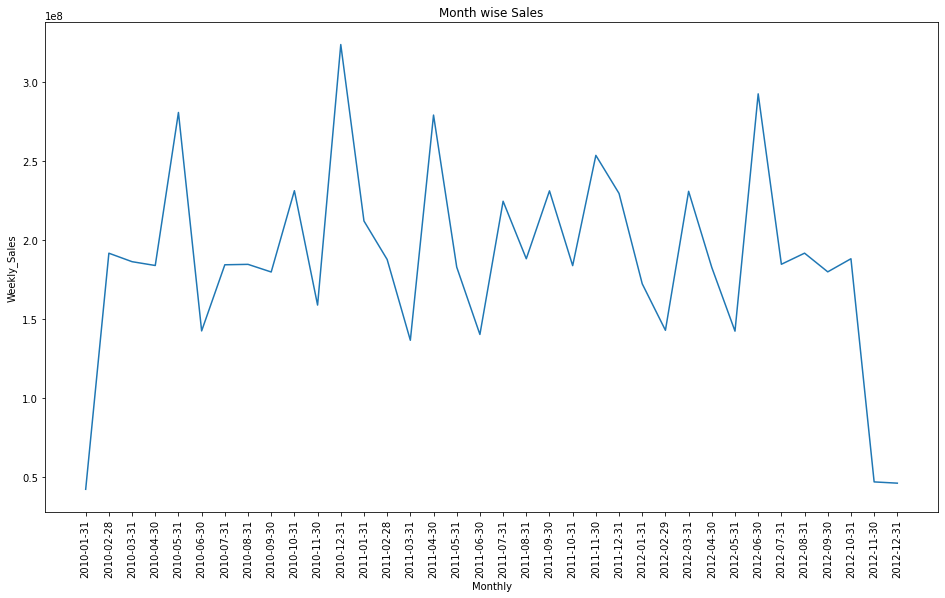

In [123]:
# Monthly Sales
monthly = df.groupby(pd.Grouper(key='Date',freq='1M')).sum()
monthly= monthly.reset_index()
fig,ax=plt.subplots(figsize=(16,9))
sns.lineplot(x=monthly['Date'].dt.strftime('%Y-%m-%d'),y=monthly['Weekly_Sales'])
plt.xticks(rotation=90)
plt.title("Month wise Sales")
plt.xlabel("Monthly")
plt.ylabel('Weekly_Sales')
plt.show()

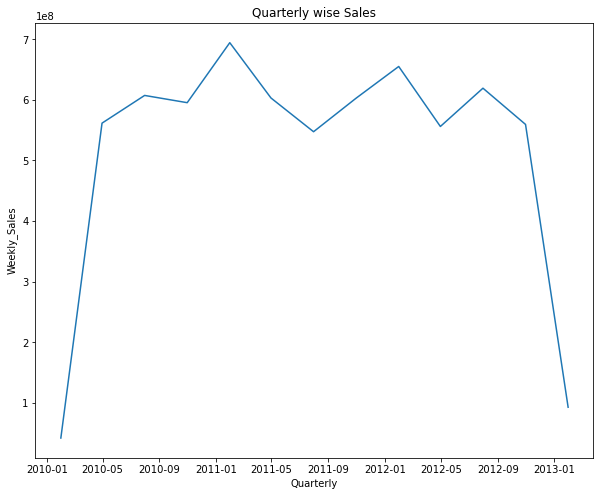

In [124]:
# Quarterly Sales
quarterly = df.groupby(pd.Grouper(key='Date',freq='3M')).sum()
quarterly= quarterly.reset_index()
plt.figure(figsize=(10,8))
plt.plot(quarterly['Date'],quarterly['Weekly_Sales'])
plt.title("Quarterly wise Sales")
plt.xlabel("Quarterly")
plt.ylabel("Weekly_Sales")
plt.show()

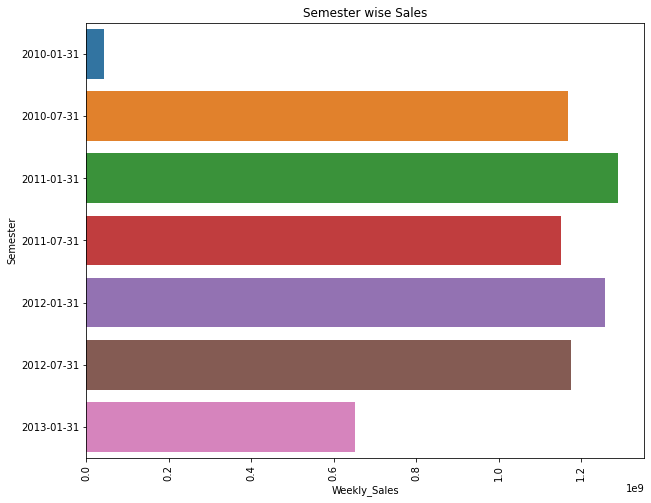

In [125]:
# Semester Sales
semester  = df.groupby((pd.Grouper(key='Date',freq='6M'))).sum()
semester = semester.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(y=semester['Date'].dt.strftime('%Y-%m-%d'),x=semester['Weekly_Sales'])
plt.title("Semester wise Sales")
plt.xticks(rotation=90)
plt.ylabel("Semester")
plt.xlabel("Weekly_Sales")
plt.show()

## We can observe from the Monthly Sales Graph that higest sum of sales is recorded in between january2011 to march2011
## we can observe from the Quarterly Sales graph that higest sum of sales is recorded in between q1 of 2011 and 2012
## we can  observe from the Quarterly Sales graph that at beginning of 1st sem of 2010 and 1st sem of 2013 sales are lowest.

### 6.Average Temperature of the Stores

In [139]:
temp = pd.DataFrame(df.groupby('Store')['Temperature'].mean())
temp = temp.reset_index()
temp = temp.rename(columns={'Temperature':"Temp_F"})

In [149]:
# Converting Fahernheit into Celsius
temp['Temp_C'] =(temp['Temp_F'] - 32) * 5/9
temp['Temp_C'] =round(temp['Temp_C'],2)
temp['Temp_F'] =round(temp['Temp_F'],2)

### The Average Temperature of stores in celsius is 15.9

## 7.Sales by  Stores Temperture

In [191]:
temp_sale = pd.DataFrame(df.groupby('Store')[['Temperature','Weekly_Sales']].mean())
temp_sale['Temp_C'] =(temp_sale['Temperature'] - 32) * 5/9

In [192]:
temp_sale.rename(columns={'Temperature':'Temp_F'},inplace=True)

In [195]:
temp_sale = temp_sale.sort_index(axis=1)
temp_sale = temp_sale.reset_index()

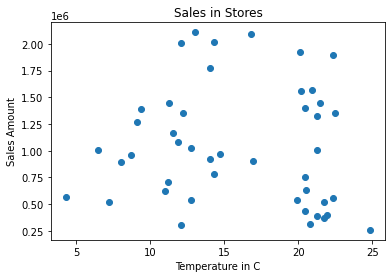

In [215]:
plt.scatter(x=temp_sale['Temp_C'],y=temp_sale['Weekly_Sales'])
plt.title('Sales in Stores')
plt.xlabel('Temperature in C')
plt.ylabel('Sales Amount')
plt.show()

## 8.Fuel Price 

In [280]:
fuel = pd.DataFrame(df.groupby(pd.Grouper(key='Date',freq='1M'))['Fuel_Price'].mean())
fuel = fuel.reset_index()

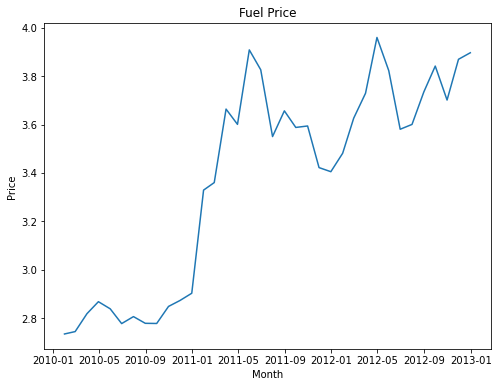

In [281]:
plt.figure(figsize=(8,6))
plt.plot(fuel['Date'],fuel['Fuel_Price'])
plt.title('Fuel Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

## After 2011 the Fuel Price has raised heavily